In [148]:
!wget -nc {esc_file} -O {data}esc.zip
!unzip {data}esc.zip -d {data}esc

--2021-07-27 17:31:05--  ftp://download.big.ac.cn/scmethmap/singlebed/ESC_Human.tar.gz
           => ‘/oak/stanford/groups/smontgom/moqri/data/meth/esc.zip’
Resolving download.big.ac.cn (download.big.ac.cn)... 124.16.164.229
Connecting to download.big.ac.cn (download.big.ac.cn)|124.16.164.229|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /scmethmap/singlebed ... done.
==> SIZE ESC_Human.tar.gz ... 14545776332
==> PASV ... done.    ==> RETR ESC_Human.tar.gz ... done.
Length: 14545776332 (14G) (unauthoritative)

12% [===>                                 ] 1,835,928,248  724KB/s  eta 2h 47m ^C


In [1]:
import pandas as pd
data='/oak/stanford/groups/smontgom/moqri/data/meth/'
ewas_file='ftp://download.big.ac.cn/ewas/datahub/download/age_methylation_v1.zip'
esc_file='ftp://download.big.ac.cn/scmethmap/singlebed/ESC_Human.tar.gz'

In [2]:
meta=pd.read_table(data+'ewas/age_methylation_v1.txt',nrows=2,index_col=0).T
cols=list(meta[meta.tissue=='thyroid'].index)+['sample_id']

In [7]:
df=df.reset_index()

In [22]:
df.drop([0,1]).astype(float
                     ).mean()

GSM2565809    0.443201
GSM2565812    0.466832
dtype: float64

In [4]:
df=pd.read_table(data+'ewas/age_methylation_v1.txt',index_col=0,nrows=1000000,usecols=cols[0:2])
df=df.drop('tissue').T
df=df.astype(float)
#df=df[df.columns[df.isna().sum()<(len(df)/2)]]

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5213,5214) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


KeyError: "['tissue'] not found in axis"

<AxesSubplot:>

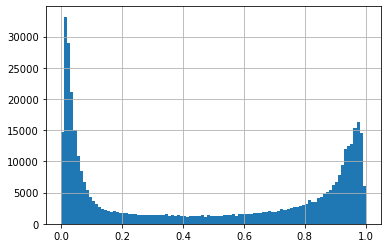

In [251]:
df.drop('age',1).iloc[8].hist(bins=100)

<AxesSubplot:>

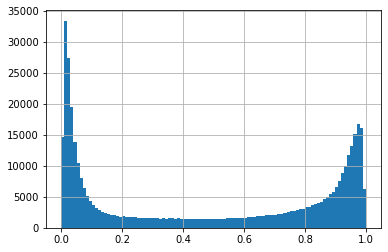

In [135]:
df.drop('age',1).mean().hist(bins=100)

In [144]:
thy=df.drop('age',1).mean()

In [141]:
meta=pd.read_table(data+'ewas/age_methylation_v1.txt',nrows=2,index_col=0).T
cols=list(meta[meta.tissue=='kidney'].index)+['sample_id']

In [145]:
df=pd.read_table(data+'ewas/age_methylation_v1.txt',index_col=0,nrows=1000000,usecols=cols)
df=df.drop('tissue').T
df=df.astype(float)
df=df[df.columns[df.isna().sum()<(len(df)/2)]]

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,257

<AxesSubplot:>

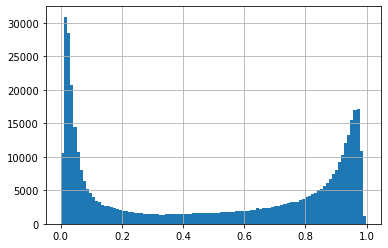

In [146]:
df.drop('age',1).mean().hist(bins=100)

In [149]:
kid=df.drop('age',1).mean()

In [155]:
thy=thy[thy.index.intersection(kid.index)]
kid=kid[thy.index.intersection(kid.index)]

In [159]:
df=pd.concat([thy,kid],1)

<AxesSubplot:xlabel='0', ylabel='1'>

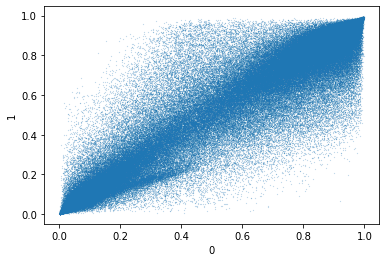

In [170]:
df.plot.scatter(0,1,s=0.01)

In [171]:
df.corr()

,0,1
0,1.000000,0.972094
1,0.972094,1.000000


(19, 485577)


<AxesSubplot:>

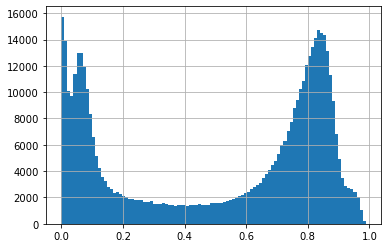

In [173]:
hsc=pd.read_table(data+'hsc.txt',skiprows=92,index_col=0)
hsc_meta=pd.read_table(data+'hsc.txt',skiprows=52,nrows=20,index_col=0)
hsc=hsc[hsc_meta[[c for c in hsc_meta.columns if 'ES__' in c]].iloc[0].values].drop('!series_matrix_table_end').T
print(hsc.shape)
hsc.mean().hist(bins=100)

In [184]:
hsc=hsc[df.index]

In [189]:
hsc=hsc.mean()

KeyError: 1

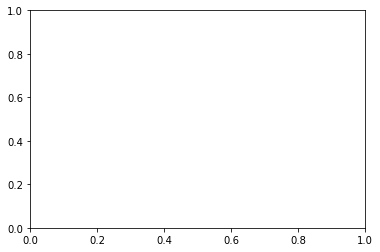

In [217]:
pd.concat([hsc,kid],1).plot.scatter(0,1,s=0.01)

In [19]:
hsc1=pd.read_table('GSM1427284.txt',index_col=0)
hsc2=pd.read_table('GSM1427285.txt',index_col=0)

In [231]:
df=pd.concat([hsc1,hsc2],1)

In [232]:
df.columns=[0,1]

<AxesSubplot:xlabel='0', ylabel='1'>

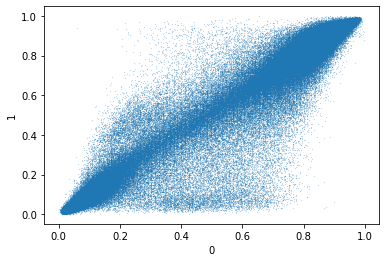

In [233]:
df.plot.scatter(0,1,s=0.01)

In [234]:
df.corr()

,0,1
0,1.000000,0.978715
1,0.978715,1.000000


array([[<AxesSubplot:title={'center':'NA'}>]], dtype=object)

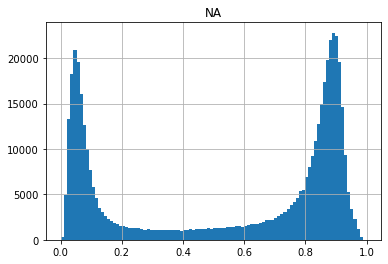

In [254]:
hsc1.hist(bins=100)

In [21]:
df.mean()

Series([], dtype: float64)

In [ ]:
df.drop('age',1).iloc[0:1].T.corr()